# Application to imaging

In [1]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [14]:
vmin = 0
vmax = 1
image_bias = 1 # sometimes 1

# 0 for black, 1 for white
def plot_svd(A):
    n = len(A) 
    imshow(image_bias-A, cmap='gray', vmin=vmin, vmax=vmax) 
    plt.show()
    U, S, V = svd(A)

    imgs = []
    for i in range(n):
        imgs.append(S[i]*np.outer(U[:,i],V[i]))   # S[i]*U[:,i]*V[i]

    combined_imgs = []
    for i in range(n):
        img = sum(imgs[:i+1])   # sum of all images up to and including i
        combined_imgs.append(img) 
        
    fig, axes = plt.subplots(figsize = (n*n,n), nrows = 1, ncols = n, sharex=True, sharey=True)
    for num, ax in zip(range(n), axes):
        ax.imshow(image_bias-imgs[num], cmap='gray', vmin=vmin, vmax=vmax)    
        ax.set_title(np.round(S[num],2), fontsize=80)   # this is the singular value
    plt.show()
    
    fig, axes = plt.subplots(figsize = (n*n,n), nrows = 1, ncols = n, sharex=True, sharey=True)
    for num, ax in zip(range(n), axes):
        ax.imshow(image_bias-combined_imgs[num], cmap='gray', vmin=vmin, vmax=vmax)   # this is the combined image
    plt.show()

    return U,S,V

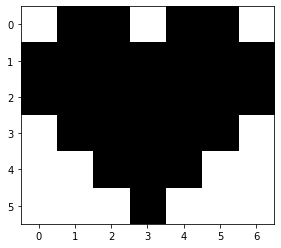

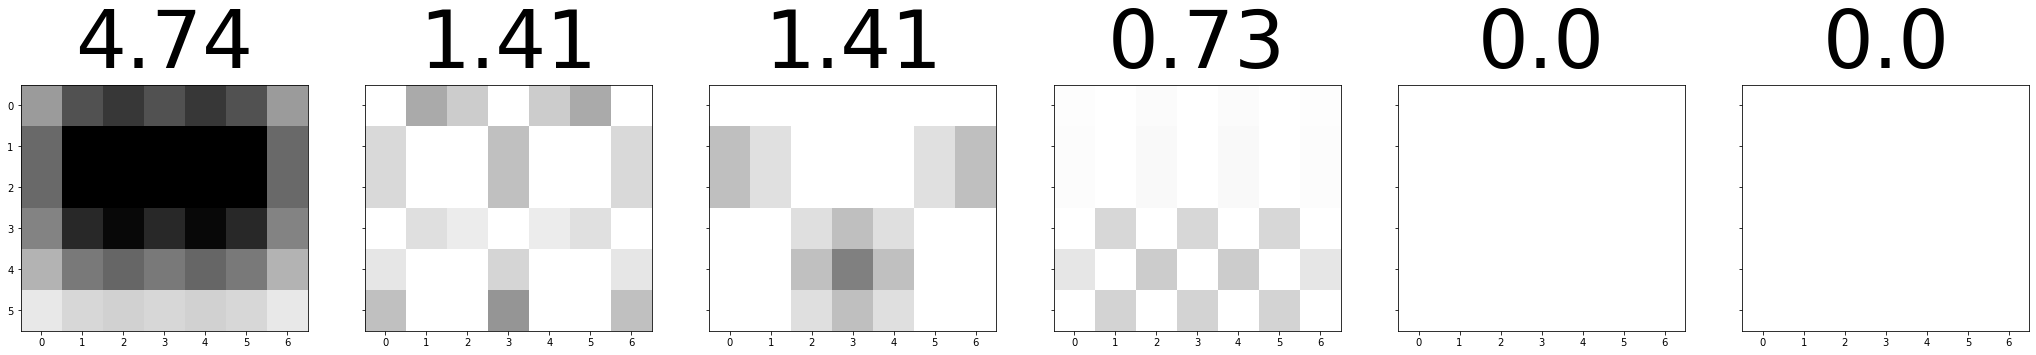

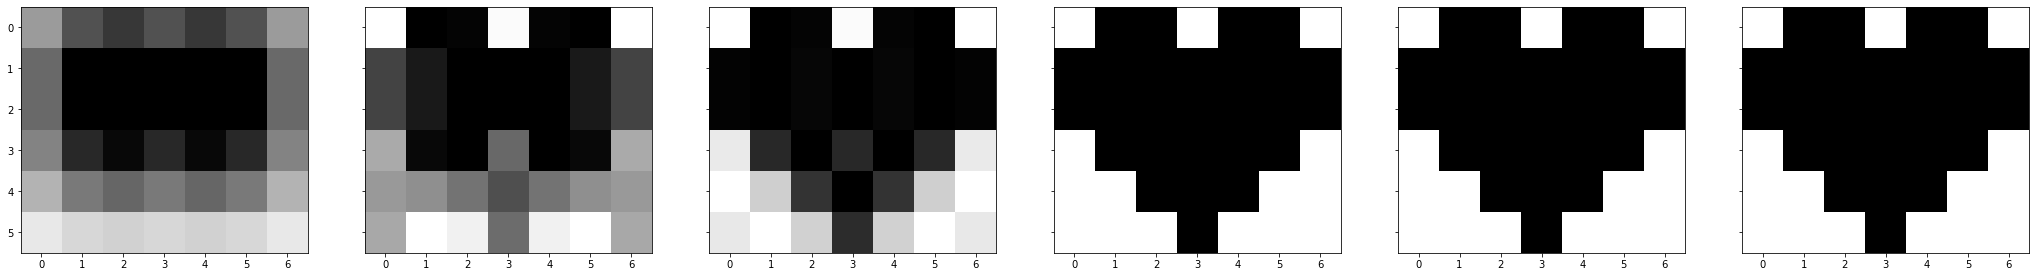

In [15]:
D = np.array([[0,1,1,0,1,1,0],
              [1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1],
              [0,1,1,1,1,1,0],
              [0,0,1,1,1,0,0],
              [0,0,0,1,0,0,0],
             ])
U,S,V = plot_svd(D)

In [4]:
print(np.round(U,2))  # U is the left singular vectors
print()
sigma = np.diag(S)    # diagonal matrix of singular values
print(np.round(sigma,2)) 
print()
print(np.round(V,2))   # v is the right singular vectors

[[-0.36 -0.73  0.   -0.05 -0.29 -0.5 ]
 [-0.54  0.27  0.35 -0.08  0.61 -0.35]
 [-0.54  0.27  0.35 -0.08 -0.61  0.35]
 [-0.45 -0.27 -0.35  0.52  0.29  0.5 ]
 [-0.28  0.18 -0.71 -0.62  0.    0.  ]
 [-0.08  0.46 -0.35  0.57 -0.29 -0.5 ]]

[[4.74 0.   0.   0.   0.   0.  ]
 [0.   1.41 0.   0.   0.   0.  ]
 [0.   0.   1.41 0.   0.   0.  ]
 [0.   0.   0.   0.73 0.   0.  ]
 [0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.  ]]

[[-0.23 -0.4  -0.46 -0.4  -0.46 -0.4  -0.23]
 [ 0.39 -0.32 -0.19  0.65 -0.19 -0.32  0.39]
 [ 0.5   0.25 -0.25 -0.5  -0.25  0.25  0.5 ]
 [-0.22  0.42 -0.44  0.42 -0.44  0.42 -0.22]
 [-0.6   0.36  0.08 -0.   -0.08 -0.36  0.6 ]
 [ 0.34  0.6  -0.18 -0.    0.18 -0.6  -0.34]
 [-0.16 -0.11 -0.68  0.    0.68  0.11  0.16]]


# Different shapes

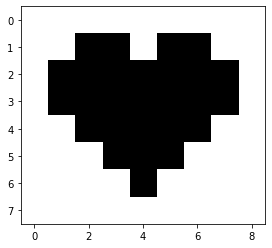

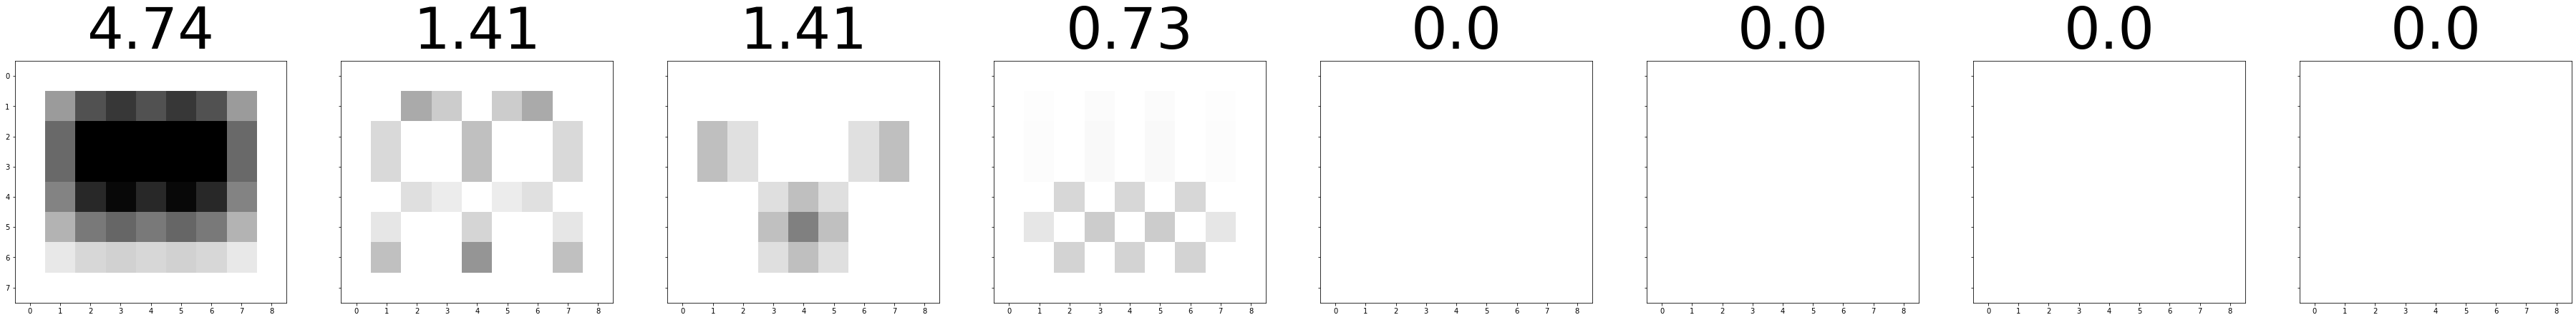

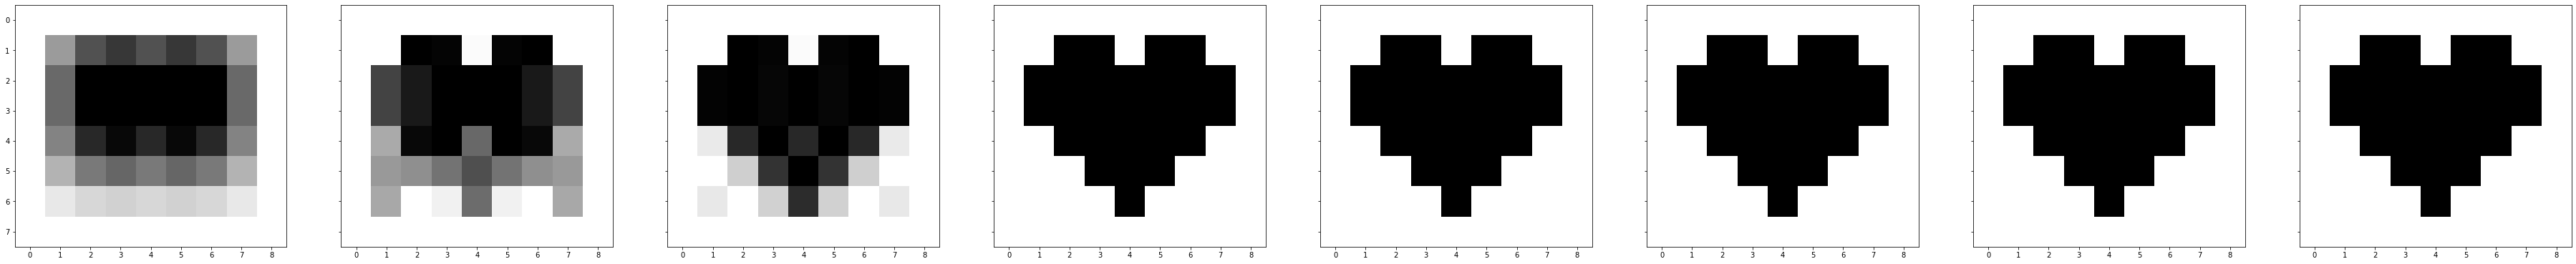

In [5]:
C = np.array([[0,0,0,0,0,0,0,0,0],
              [0,0,1,1,0,1,1,0,0],
              [0,1,1,1,1,1,1,1,0],
              [0,1,1,1,1,1,1,1,0],
              [0,0,1,1,1,1,1,0,0],
              [0,0,0,1,1,1,0,0,0],
              [0,0,0,0,1,0,0,0,0],
              [0,0,0,0,0,0,0,0,0]
             ])
U,S,V = plot_svd(C)

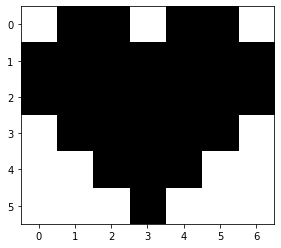

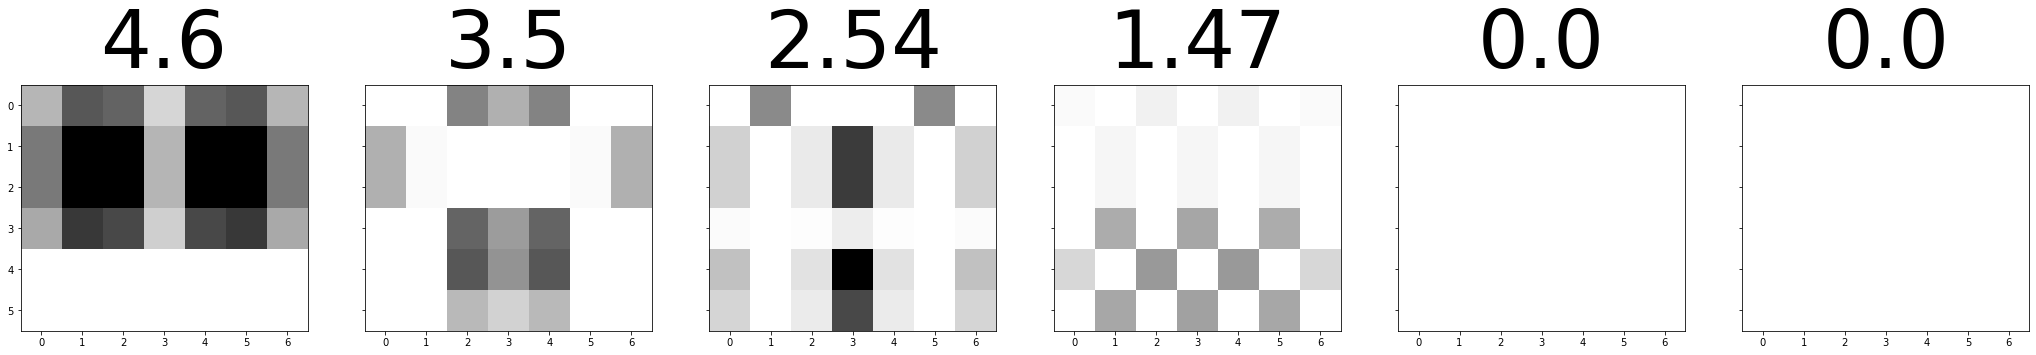

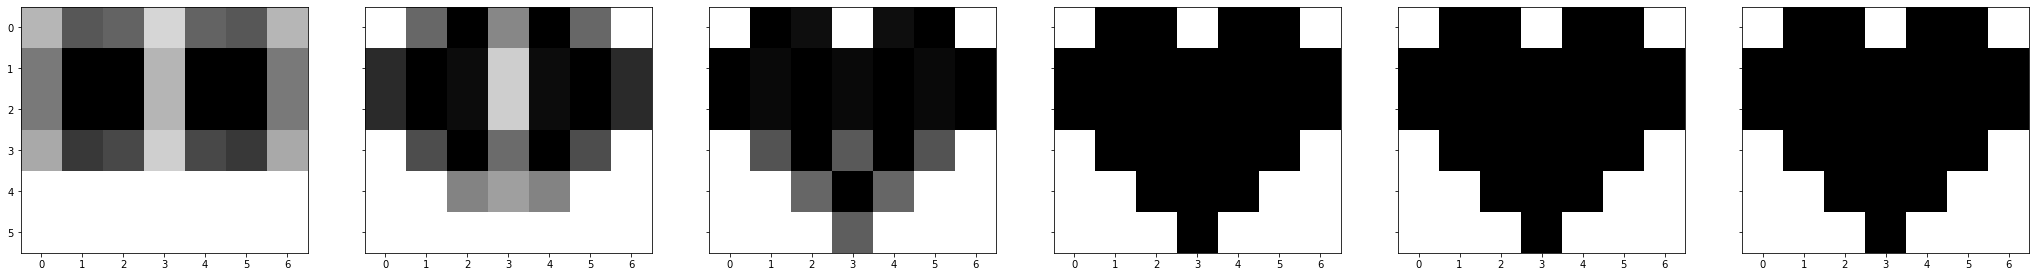

In [6]:
D = np.array([[-1,1,1,-1,1,1,-1],
              [1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1],
              [-1,1,1,1,1,1,-1],
              [-1,-1,1,1,1,-1,-1],
              [-1,-1,-1,1,-1,-1,-1],
             ])
U,S,V = plot_svd(D)

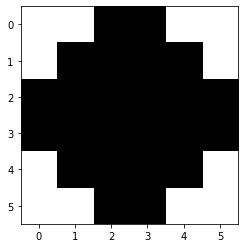

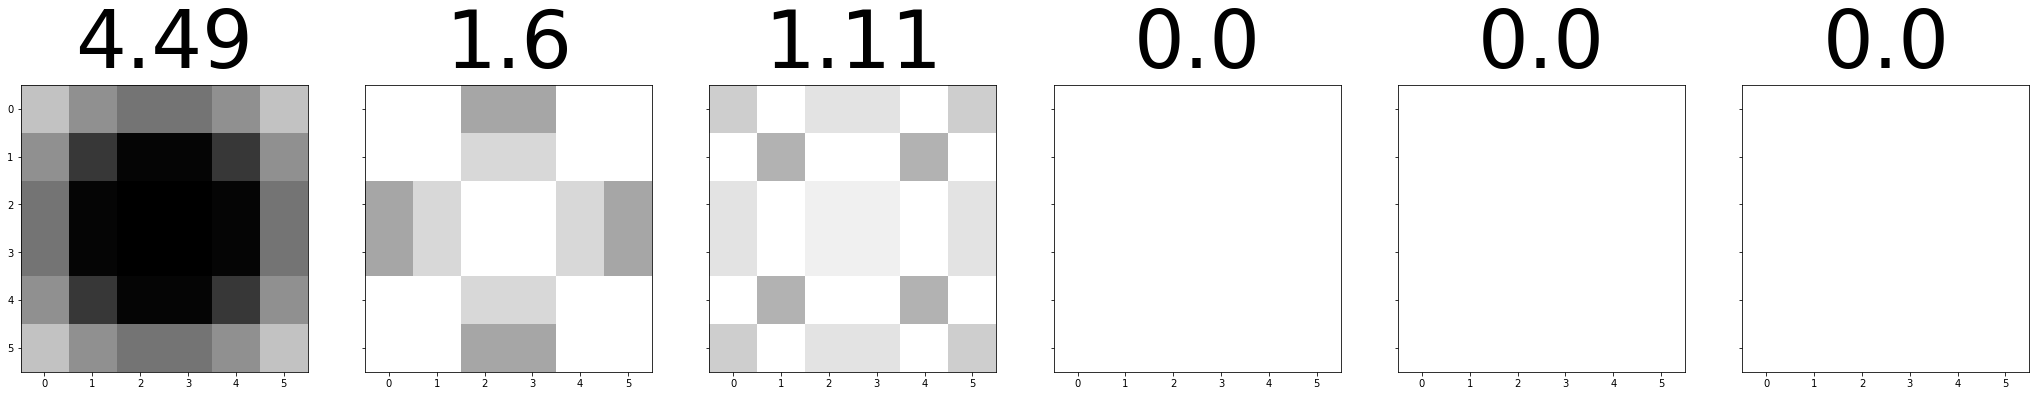

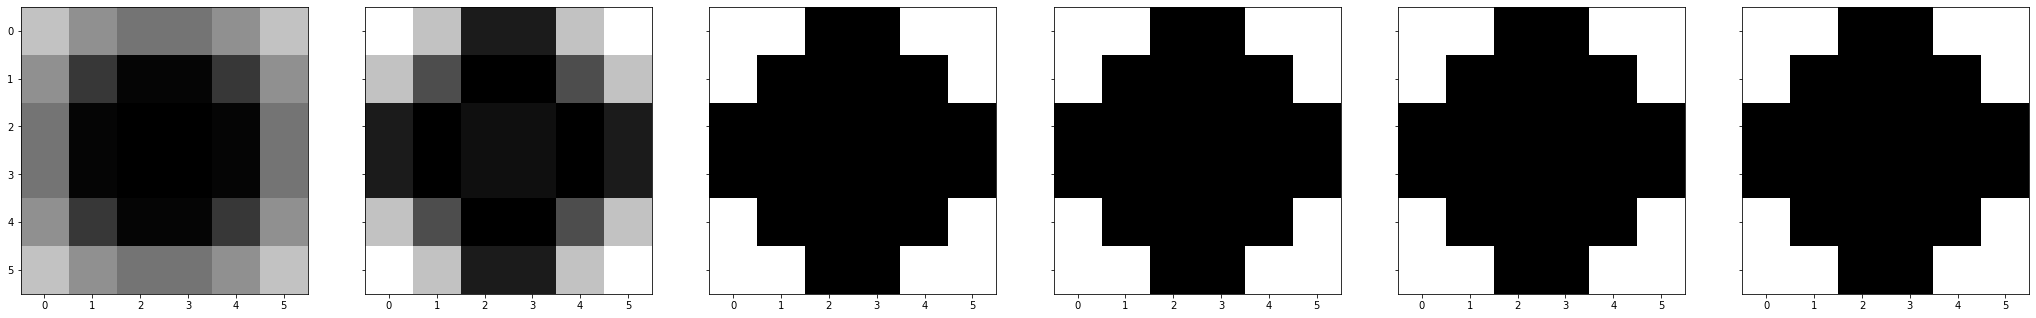

In [7]:
D = np.array([[0,0,1,1,0,0],
              [0,1,1,1,1,0],
              [1,1,1,1,1,1],
              [1,1,1,1,1,1],
              [0,1,1,1,1,0],
              [0,0,1,1,0,0],
             ])
U,S,V = plot_svd(D)